# UPPGIFT 1

# A

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.graph_objects as go

covid_stats = pd.read_excel("../Data/Covid19.xlsx", sheet_name="Veckodata Riket")


In [2]:
# alla kolumner int eller float
# Antal_avlidna_milj_inv_vecka - float
# Kum_antal_avlidna_milj_inv - float
# resten int

covid_stats.info()

# 13 kolumner
# 142 rader

# covid_stats.describe()
# covid_stats.value_counts()
# covid_stats.columns
# covid_stats.index


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

# 1B
- Slår ihop kolumnerna, samt lägger till ett "v" emellan för att få veckorna.
- gör till en lista för att visa hur formatet är detsamma som i uppgiften

In [3]:
covid_stats["Vecka"] = covid_stats['år'].astype(str) + "v" + covid_stats["veckonummer"].astype(str)
covid_stats["Vecka"].reset_index(drop=True,inplace=True)
covid_stats["Vecka"]

0       2020v6
1       2020v7
2       2020v8
3       2020v9
4      2020v10
        ...   
137    2022v38
138    2022v39
139    2022v40
140    2022v41
141    2022v42
Name: Vecka, Length: 142, dtype: object

# 1C

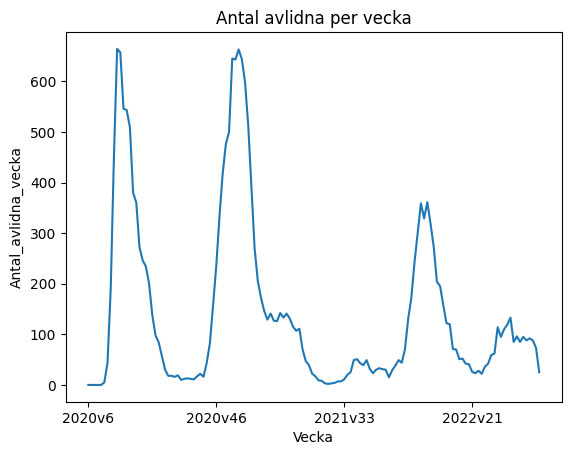

In [4]:

weeknumbers = covid_stats['Vecka']
deaths_per_week = covid_stats["Antal_avlidna_vecka"]

ax = plt.axes()
sns.lineplot(x = weeknumbers, y = deaths_per_week, ax = ax)
ax.set(title = "Antal avlidna per vecka")
ax.xaxis.set_major_locator(plt.MaxNLocator(5)) # writes 4 values in x-axis instead of all values, which makes it unreadable

plt.savefig("../Labb_1/Visualiseringar/Antal_avlidna_per_vecka.png")

# 1D

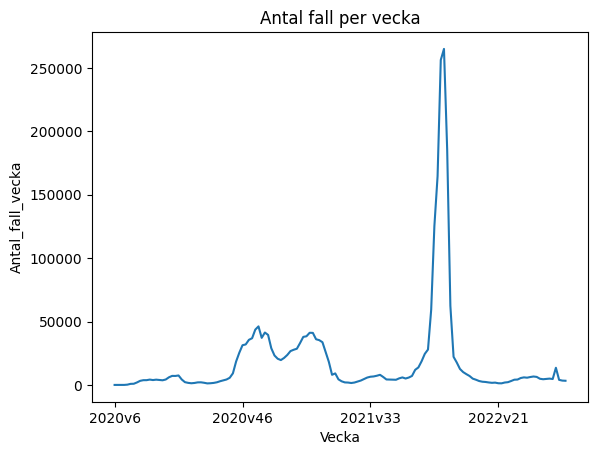

In [5]:
weeknumbers = covid_stats['Vecka']
incidents_week = covid_stats["Antal_fall_vecka"]

ax = plt.axes()
sns.lineplot(x = weeknumbers, y = incidents_week, ax = ax)
ax.set(title = "Antal fall per vecka")
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

plt.savefig("../Labb_1/Visualiseringar/Antal_fall_per_vecka.png")

# 1E

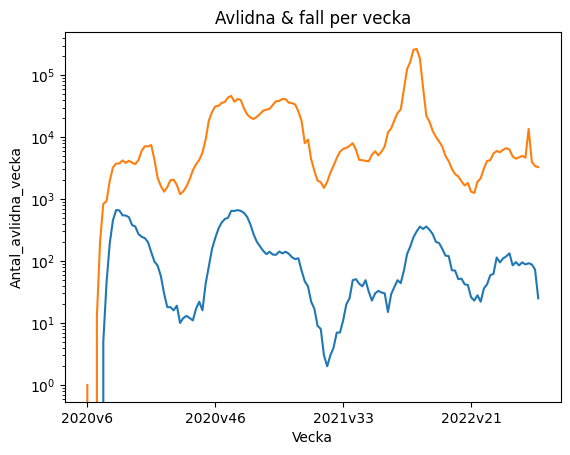

In [6]:
ax = plt.axes()
sns.lineplot(x = weeknumbers, y = deaths_per_week, ax = ax)
sns.lineplot(x = weeknumbers, y = incidents_week, ax = ax)
ax.set(title = "Avlidna & fall per vecka")
ax.set_yscale("log") # y-axis set to logarithmic which makes it easier to compare and read
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

plt.savefig("../Labb_1/Visualiseringar/Avlidna_&_fall_per_vecka")

# 1F

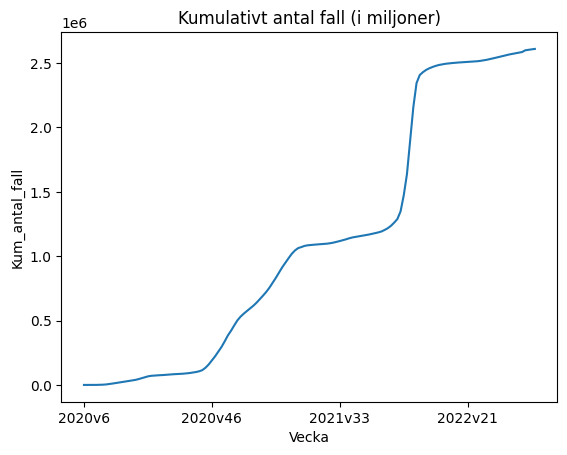

In [7]:
kum_antal_fall = covid_stats["Kum_antal_fall"]

ax = plt.subplot()
sns.lineplot(x = weeknumbers, y = kum_antal_fall, ax = ax)
ax.set(title = "Kumulativt antal fall (i miljoner)")
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

plt.savefig("../Labb_1/Visualiseringar/Kumulativt_antal_fall.png")

# UPPGIFT 2

# A

In [8]:
vaccin = pd.read_excel("../Data/vaccine.xlsx", sheet_name="Vaccinerade kommun och ålder")

len(vaccin["Län"].drop_duplicates())

# There is 21 provinces represented

21

# B

In [9]:
len(vaccin["Kommun"].drop_duplicates())

# 290 municipalaties represented

290

# C

In [10]:
sum(vaccin["Befolkning"])

# 9,092,790 people are represented in this dataset

9092790

# D

In [11]:

demo_pop = [] # create a list where i can put all of the values

# Loop that puts together the populationnumbers for each age group
# gets appended to a list that can be used for plitting
for i in range(10):
    x = sum(vaccin["Befolkning"].iloc[i::10])
    demo_pop.append(x)

# sum(demo_pop) # checked sum just to make sure that it is the same as the earlier exercise

# pick out all age groups in order for us to be able to plot them
demo_age = []

for i in range(10):
    x = vaccin["Ålder"].iloc[i]
    demo_age.append(x)

# vaccin[(vaccin["Ålder"] == "12-15")] # Another way to be able to pick age groups

In [12]:
fig = px.bar(
    vaccin,
    x=demo_age,
    y=demo_pop,
    title="Fördelning av befolkning"
)
fig.show()

fig.write_html("../Labb_1/Visualiseringar/Fördelning_av_befolkning.html")

# F (a)

In [13]:
# groups the sum of each province with the name of the province
dos1 = vaccin.groupby("Län_namn")["Antal minst 1 dos"].sum() / vaccin.groupby("Län_namn")["Befolkning"].sum()
dos2 = vaccin.groupby("Län_namn")["Antal minst 2 doser"].sum() / vaccin.groupby("Län_namn")["Befolkning"].sum()
dos3 = vaccin.groupby("Län_namn")["Antal 3 doser"].sum() / vaccin.groupby("Län_namn")["Befolkning"].sum()

fig = px.bar(
    y=[dos1, dos2, dos3],
    x=vaccin.Län_namn.unique(),
    barmode= 'group', # groups the bars next to eachother instead of stacking on eachother
    labels={
        "value": "Befolkning",
        "variable": "Doser:",
        "x": "Sveriges Län",
    },
    title="Andel vaccinerade per län"
)

newnames = {
    "wide_variable_0": "Dos 1",
    "wide_variable_1": "Dos 2",
    "wide_variable_2": "Dos 3",
}

# To be able to change the sub titles for 'Antal doser' without changing the data source,
# you can switch the legendgroups name with a dict and map it onto existing subtitle names.
# I had to do this since I couldn't change it through 'labels=' like the other titles
# source: https://stackoverflow.com/questions/64371174/plotly-how-to-change-variable-label-names-for-the-legend-in-a-plotly-express-li
fig.for_each_trace(lambda t: t.update(name=newnames[t.name]))

# angles the provinces in order the read more easily
fig.update_xaxes(tickangle=40)
fig.show()

fig.write_html("../Labb_1/Visualiseringar/Andel_vaccinerade_per_län.html")

# F (b)

In [14]:
# Received help in order to group both provinces together to create 4 variables instead of 8
västra_göta_stockh = vaccin[(vaccin["Län_namn"] == "Västra Götalands län") | (vaccin["Län_namn"] == "Stockholms län")]
västra_göta_stockh_group = västra_göta_stockh.groupby("Län")

# works same as exercise above after grouping
andel_dos1 = västra_göta_stockh_group["Antal minst 1 dos"].sum() / västra_göta_stockh_group["Befolkning"].sum()
andel_dos2 = västra_göta_stockh_group["Antal minst 2 doser"].sum() / västra_göta_stockh_group["Befolkning"].sum()
andel_dos3 = västra_göta_stockh_group["Antal 3 doser"].sum() / västra_göta_stockh_group["Befolkning"].sum()
andel_dos4 = västra_göta_stockh_group["Antal 4 doser"].sum() / västra_göta_stockh_group["Befolkning"].sum()

fig = px.bar(
    y=[andel_dos1, andel_dos2, andel_dos3, andel_dos4],
    x=västra_göta_stockh.Län_namn.unique(),
    barmode="group",  # groups the bars next to eachother instead of stacking on eachother
    labels={
        "value": "Befolkning",
        "variable": "Antal doser",
        "x": "Sveriges Län",
    },
    title="Antal vaccinerade per län"
)

newnames = {
    "wide_variable_0": "Dos 1",
    "wide_variable_1": "Dos 2",
    "wide_variable_2": "Dos 3",
    "wide_variable_3": "Dos 4"
}

# same solution as above exercise
fig.for_each_trace(lambda t: t.update(name=newnames[t.name]))
fig.show()

fig.write_html("../Labb_1/Visualiseringar/Andel_vaccinerade_vg_sthl.html")

# Uppgift 3

In [15]:
vaccin_kommun = pd.read_excel("../data/vaccine.xlsx", sheet_name="Vaccinerade kommun")
vaccin_tidsserie = pd.read_excel("../Data/vaccine.xlsx", sheet_name="Vaccinationer tidsserie")

# 1:a KPI
- Jämföra könen i antal intensivvårdade, dödsfall och covid-fall
- Det finns 1.33% fler män i Sverige jämfört med kvinnor
- Kommer då skillnaden vara detsamma (eller nära) för intensivvårdade, dödsfall och covid-fall?

In [16]:
Kön_uppdelning = pd.read_excel("../Data/Covid19.xlsx", sheet_name="Totalt antal per kön")
Kön_uppdelning.drop(Kön_uppdelning.tail(1).index, inplace=True) # remove last row since its 'unknown' and statistically insignificant

In [17]:
fig = px.bar(Kön_uppdelning,
    y=["Totalt_antal_fall", "Totalt_antal_intensivvårdade", "Totalt_antal_avlidna"],
    x="Kön",
    barmode="group",  # groups the bars next to eachother instead of stacking on eachother
    labels={
        "value": "Befolkning",
        "variable": "Antal fall av Covid-19",
    },
    title="Antal fall per kön",
    log_y=True # easier to read, makes y-axes logarithmic
)

fig.show()
fig.write_html("../Labb_1/Visualiseringar/KPI_1_Antal_fall_per_kön-")

- Som vi kan se så är skillnaden större på alla jämförelser än 1.33%
* Antal fall har en skillnad på 14.13% (Män har den högre siffran)
* Antal intenssivvårdade har en skillnad på 55% (Män har den högre siffran)
* Antal avlidna har en skillnad på 17.78% (Män har den högre siffran)

- Som vi då kan se så har män utan tvekan större risk på alla fronter, speciellt intensivvård.
- Varför siffran är såpass stor på intensivvården hade varit intressant att utforska

# 2:a KPI
- Jämföra antal kumulativ fall, avlidna och intensivvårdade
- Kommer troligtvis ligga relativt nära varandra

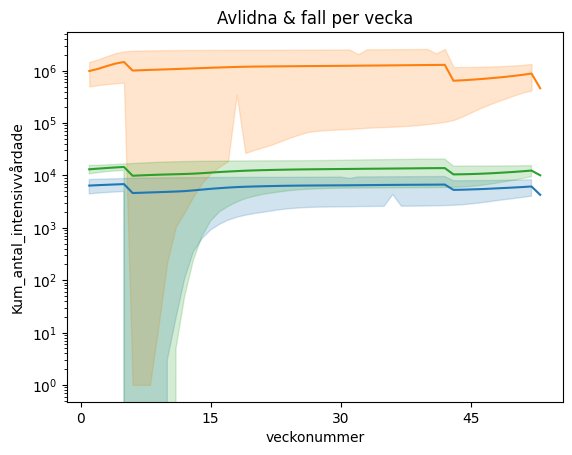

In [18]:
covid_stats = pd.read_excel("../Data/Covid19.xlsx", sheet_name="Veckodata Riket")

weeknumbers = covid_stats['veckonummer']
kum_intensiv = covid_stats['Kum_antal_intensivvårdade']
kum_fall = covid_stats['Kum_antal_fall']
kum_avlidna = covid_stats['Kum_antal_avlidna']

ax = plt.axes()
sns.lineplot(x = weeknumbers, y = kum_intensiv, ax = ax)
sns.lineplot(x = weeknumbers, y = kum_fall, ax = ax)
sns.lineplot(x = weeknumbers, y = kum_avlidna, ax = ax)
ax.set(title = "Avlidna & fall per vecka")
ax.set_yscale("log") # y-axis set to logarithmic which makes it easier to compare and read
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

plt.savefig("../Labb_1/Visualiseringar/KPI_2_kum_fall_intensivv_fall")

- Följer varandra perfekt, vilket såklart känns självklart

# 3:e KPI
- Jämföra hur många fall per 100_000 invånare i varje län
- Jämföra och se ifall om man kan dra slutsatser på vart i landet risken för fall är högst.
- Kolla om antal fall per 100_000 ser annorlunda ut mer söder ut eller norr.

In [19]:
import json
import numpy as np
df_region = pd.read_excel("../Data/Covid19.xlsx", sheet_name="Totalt antal per region")
# needed to download a freely available json file in order to map out the different provinces

# the keys on the geojson files for some reason didn't match up correctly on the map,
# so i had to use: df_region.insert(1, "id", np.arange(21)) so i could mouseover all provinces
# and see their actually id-key, then insert them in the correct order in a new column (this took god damn forever to figure out)
df_region.insert(1, "id", [18, 3, 15, 0, 9, 11, 1, 2, 4, 12, 20, 16, 7, 17, 10, 14, 13, 8, 19, 5, 6])

- För denna KPI behövde jag använda mig utav dessa resurser för att kunna få kartan att mapa korrekt.
- https://www.youtube.com/watch?v=aJmaw3QKMvk&t=687s
- https://community.plotly.com/t/choropleth-map-error-empty-map/39521

In [20]:
with open("../Data/swedish_regions.geojson.txt", "r") as fp:
    jdata = json.load(fp)

# needed for-loop for maping out id's correctly, otherwise we'll get an empty map.
for k in range(len(jdata['features'])):
    jdata['features'][k]['id'] = k

fig = px.choropleth_mapbox(
    df_region, # dataframe
    geojson=jdata, # geojson file name
    locations='id', # keys for the provinces
    color="Fall_per_100000_inv", # df column
    color_continuous_scale="hot_r",
    range_color=(17300, 32500),
    mapbox_style="carto-positron",
    zoom=3,
    center={"lat": 58.6952, "lon": 11.9149}, # when the map loads in, starts at northern europe (with Sweden in the middle)
    opacity=0.7,
    labels={"Fall_per_100000_inv": "Fall per 100,000 inv"},
)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}) # the entire window shows the map, instead of having frames around the map
print(f"Sverige medelvärde per län: {df_region['Fall_per_100000_inv'].mean():.0f}")
print(f"Sverige medianvärde per län: {df_region['Fall_per_100000_inv'].median():.0f}")
fig.show()
fig.write_html("../Labb_1/Visualiseringar/KPI_2_Fall_per_100000_inv")

Sverige medelvärde per län: 24763
Sverige medianvärde per län: 24999


- Jag hade förväntat mig att se framförallt: Stockholm-, Göteborg-, och Skåne-regionerna ha högst fall per 100,000.
- Det verkar dock inte som att det stämde överens med resultatet, vilket är förvånande.
- Jag hade behövt göra mera research för att kunna lista ut varför siffrorna är högst i just Örebro och Halland.
- Var väldigt coolt att kunna mapa ut länen på detta viset och hoppas att jag kommer jobba med det igen framöver.
--------------------------------------------------------------------------------------------------------------------------
- När det kommer till jämförelsen av norra och södra Sverige, så är det inte helt klart om vilken del som har högst fall per 100,000.
- Medans norra delen har låga siffror i: Norrbotten, Västerbotten och Västernorrland, så har södra Sverige också låga siffror i åtminstone 3 län: Blekinge, Gotland & Östergötland
- Precis som i tidigare frågeställning så hade det behövs göra mera research kring detta för att kunna dra någon slutsats.
-------------------------------
- Sverige medelvärde per län: 24763
- Sverige medianvärde per län: 24999
- Störst skilland: Örebro(32.379k) och Norrbotten (20.327k). En skillnad på 37.22%
- Skillnad mellan minst antal fall (Norrbotten) per 100k och Västra Götaland: 20.7%
- Skillnad mellan högst antal fall (Örebro) per 100k och Västra Götaland: 26.3%
- Skillnad mellan medelvärde och Västra Götaland: 3.4%
- Skillnad mellan median och Västra Götaland: 2.48%
-------------------------------------
- Vad som mer hade kunnat varit intressant att utforska är hur det kan vara en sådan stor skillnad på antal fall per 100k mellan två län som Örebro och Norrbotten (37.22%)).

# 4:e KPI
- Samma 3:e KPI, fast med Sverige kommuner istället

In [45]:
import json
import numpy as np

df_region2 = pd.read_excel("../Data/vaccine.xlsx", sheet_name="Vaccinerade kommun")
# needed to download a freely available json file in order to map out the different provinces

with open("../Data/swedish_municipalities.geojson.txt", "r") as fp:
    jdata2 = json.load(fp)

In [62]:
jdata2['features']['id'].keys(

TypeError: list indices must be integers or slices, not str

In [64]:
for k in range(len(jdata2['features'])):
    jdata2['features'][k]['id'] = k

fig = px.choropleth_mapbox(
    df_region2, # dataframe
    geojson=jdata2, # geojson file name
    locations='KnNamn', # keys for the provinces
    color="Antal_dos1", # df column
    color_continuous_scale="hot_r",
    range_color=(17300, 32500),
    mapbox_style="carto-positron",
    zoom=3,
    center={"lat": 58.6952, "lon": 11.9149}, # when the map loads in, starts at northern europe (with Sweden in the middle)
    opacity=0.7,
    labels={"Fall_per_100000_inv": "Fall per 100,000 inv"},
)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}) # the entire window shows the map, instead of having frames around the map

fig.show()
fig.write_html("../Labb_1/Visualiseringar/KPI_2_Fall_per_100000_inv")

In [50]:
print(jdata['features'][0].keys())
#dict_keys(['type', 'geometry', 'properties'])  #display the definition of a feature

for f in jdata['features'][:5]:
    print(f['properties'])

dict_keys(['type', 'geometry', 'properties', 'id'])
{'name': 'GÃ¤vleborg', 'color': 2, 'l_id': 21}
{'name': 'JÃ¶nkÃ¶ping', 'color': 2, 'l_id': 6}
{'name': 'Kalmar', 'color': 1, 'l_id': 8}
{'name': 'Dalarna', 'color': 1, 'l_id': 20}
{'name': 'Kronoberg', 'color': 4, 'l_id': 7}
